

**Medical Cost - Regression Project**

* Created By : Blessy louis
* Email: blessylouis2002@gmail.com
* Created On: 03.06.2024



---



# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

The dataset you described likely focuses on individual health insurance costs and related factors.

* age: This represents the policyholder's age, likely in years. It's an important factor as medical needs tend to increase with age.
* sex: This indicates the policyholder's gender (male or female). Medical costs can vary depending on gender due to biological differences and healthcare utilization patterns.
* bmi: This stands for Body Mass Index, a measure of body fat based on height and weight. Higher BMI is often linked to higher healthcare costs due to increased risk of certain diseases.
* children: This indicates the number of dependent children covered by the policy. This can influence costs as children also incur medical expenses.
* smoker: This is a binary feature indicating whether the policyholder smokes (yes/no). Smoking is a significant risk factor for various diseases, leading to potentially higher medical costs.
* region: This represents the geographical location of the policyholder. Medical costs can vary depending on factors like regional healthcare access, cost of living, and insurance provider availability.
* charges: This is likely the target variable, representing the total annual medical charges incurred by the policyholder.

Overall, this dataset appears suitable for analyzing factors that influence individual health insurance costs

In [ ]:
df=pd.read_csv('Medical cost.csv')


# EDA

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
# Identify duplicates using duplicated() and consider all columns
duplicates = df[df.duplicated()]

# Print the duplicate rows
print("Duplicate rows:")
print(duplicates)

# Remove duplicates (keeps the first occurrence)
df.drop_duplicates(inplace=True)

# Print the data after removing duplicates
print("\nData after removing duplicates:")
print(df)

Duplicate rows:
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631

Data after removing duplicates:
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]


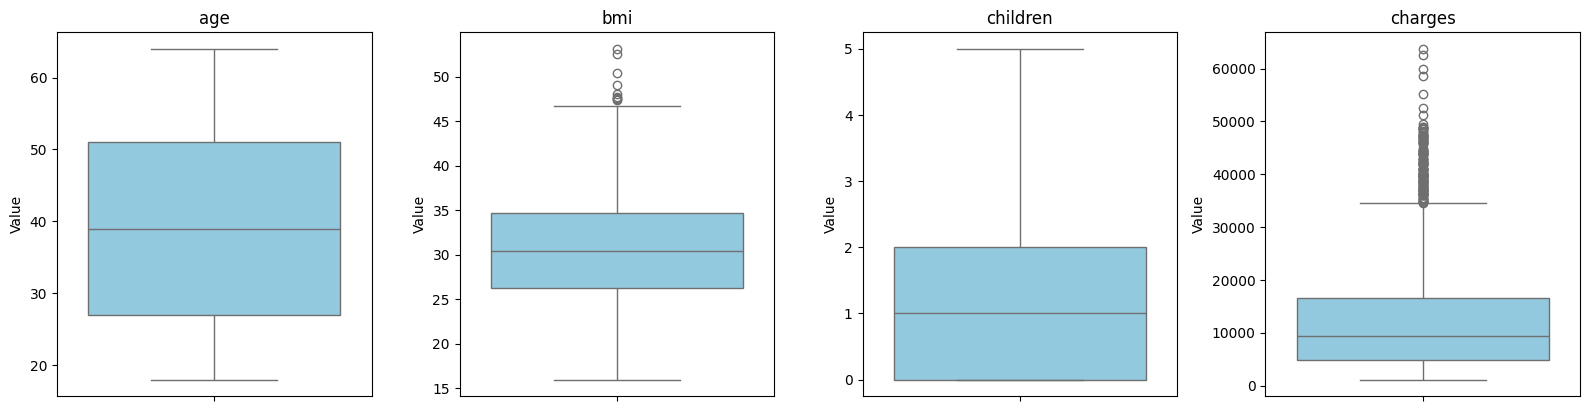

In [ ]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for numerical columns
plt.figure(figsize=(16, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df[column], orient='v', color='skyblue')
    plt.title(column)
    plt.ylabel('Value')
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [ ]:
q1 = df['bmi'].quantile(0.25)  # First quartile
q3 = df['bmi'].quantile(0.75)  # Third quartile
iqr = q3 - q1  # Interquartile range
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]
print(outliers)

      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


In [ ]:
q1 = df['charges'].quantile(0.25)  # First quartile
q3 = df['charges'].quantile(0.75)  # Third quartile
iqr = q3 - q1  # Interquartile range
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)]
print(outliers)

      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[139 rows x 7 columns]


In [ ]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


# Visualizations

Text(0.5, 1.0, 'Histogram of Age')

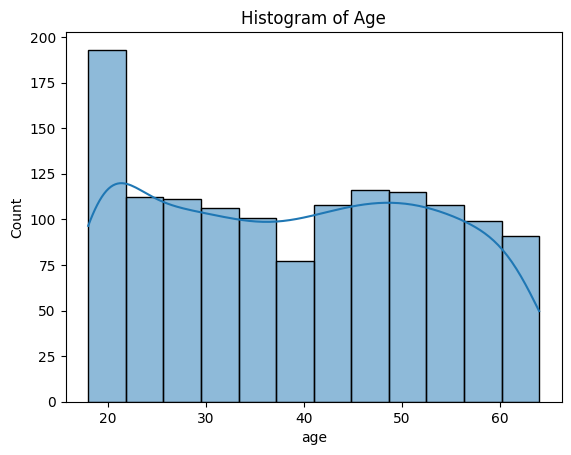

In [ ]:
sns.histplot(df['age'], kde=True)
plt.title('Histogram of Age')

Text(0.5, 1.0, 'Histogram of BMI')

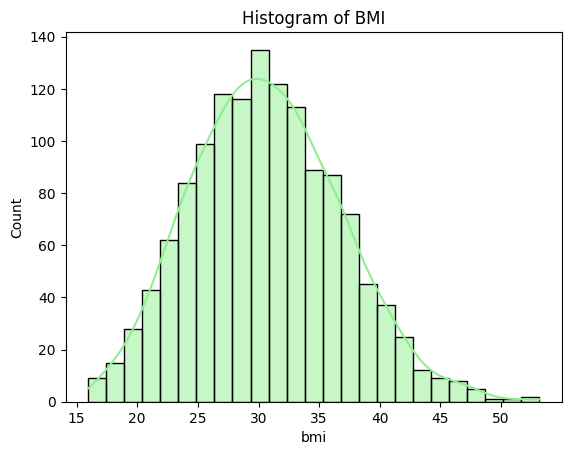

In [ ]:

sns.histplot(df['bmi'], kde=True, color='lightgreen')
plt.title('Histogram of BMI')

Text(0.5, 1.0, 'QQ Plot of BMI')

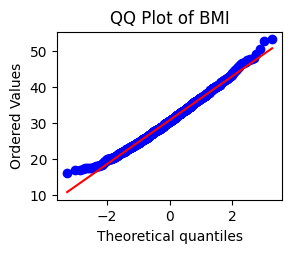

In [ ]:
from scipy import stats
plt.subplot(2, 2, 3)
stats.probplot(df['bmi'], dist="norm", plot=plt)
plt.title('QQ Plot of BMI')


In [ ]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

Frequency Table for Sex:
      sex  Frequency
0    male        675
1  female        662


<ipython-input-20-ce7aea62b6c3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sex_frequency, x='sex', y='Frequency', palette="husl")


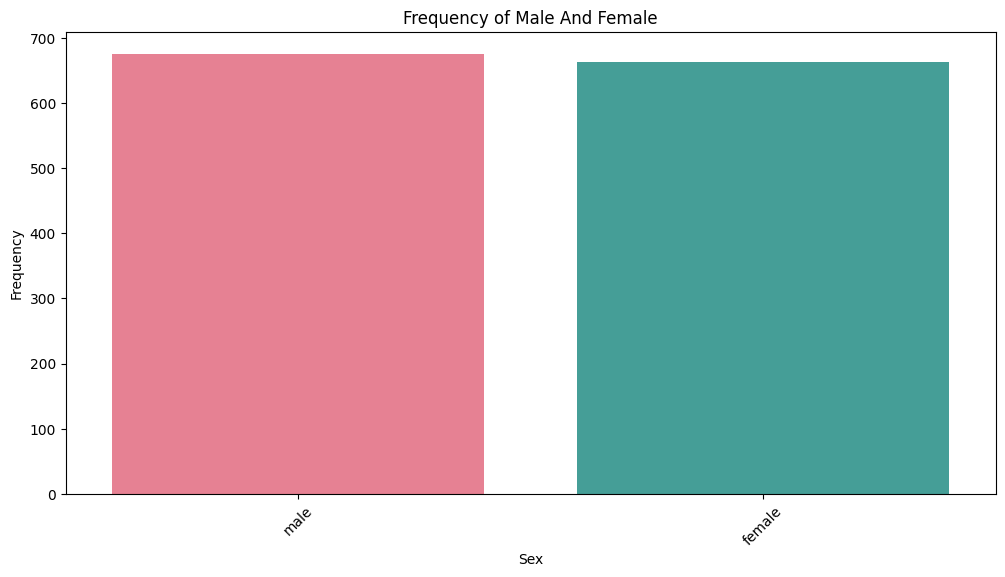

In [ ]:

sex_frequency = df['sex'].value_counts().reset_index()
sex_frequency.columns = ['sex', 'Frequency']
print('Frequency Table for Sex:')
print(sex_frequency)



plt.figure(figsize=(12, 6))
sns.barplot(data=sex_frequency, x='sex', y='Frequency', palette="husl")
plt.title('Frequency of Male And Female')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Frequency Table for Smokers:
  smoker  Frequency
0     no       1063
1    yes        274


<ipython-input-21-37171fae48ac>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=smoker_frequency, x='smoker', y='Frequency', palette="muted")


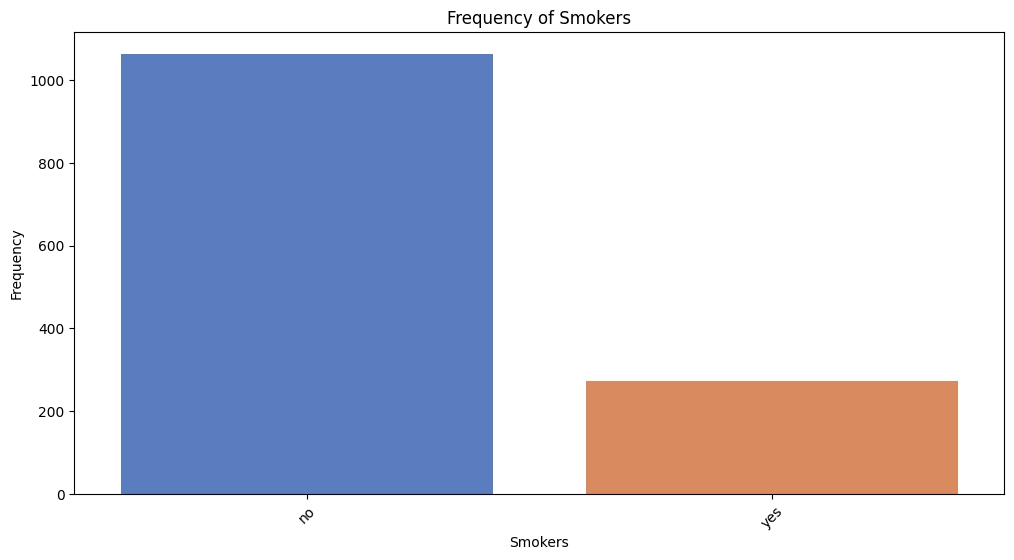

In [ ]:

smoker_frequency = df['smoker'].value_counts().reset_index()
smoker_frequency.columns = ['smoker', 'Frequency']
print('Frequency Table for Smokers:')
print(smoker_frequency)




plt.figure(figsize=(12, 6))
sns.barplot(data=smoker_frequency, x='smoker', y='Frequency', palette="muted")
plt.title('Frequency of Smokers')
plt.xlabel('Smokers')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Frequency Table for Children:
   children  Frequency
0         0        573
1         1        324
2         2        240
3         3        157
4         4         25
5         5         18


<ipython-input-22-617c8ca9a515>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=children_frequency, x='children', y='Frequency', palette="Set2")


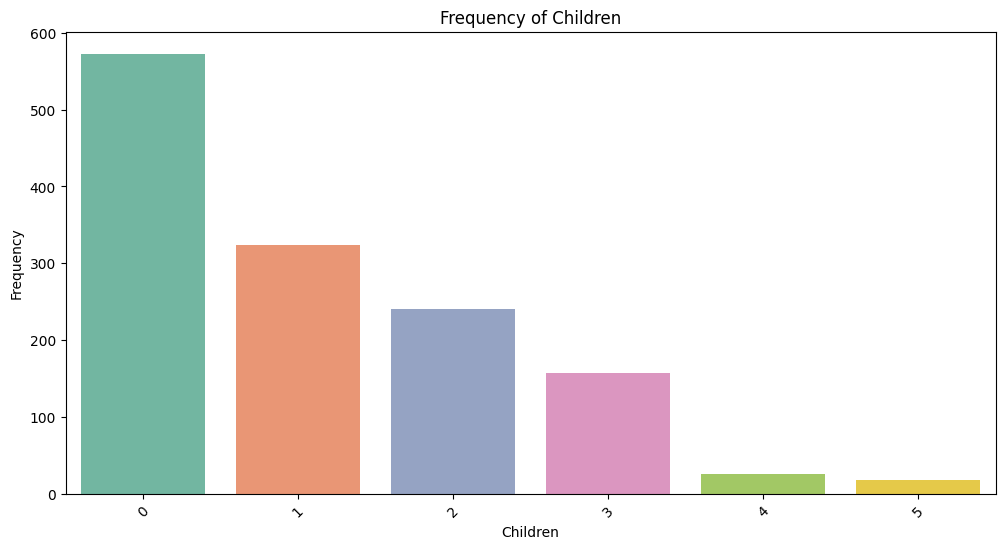

In [ ]:

children_frequency = df['children'].value_counts().reset_index()
children_frequency.columns = ['children', 'Frequency']
print('Frequency Table for Children:')
print(children_frequency)



plt.figure(figsize=(12, 6))
sns.barplot(data=children_frequency, x='children', y='Frequency', palette="Set2")
plt.title('Frequency of Children')
plt.xlabel('Children')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Frequency Table for Region:
      region  Frequency
0  southeast        364
1  southwest        325
2  northwest        324
3  northeast        324


<ipython-input-24-4fb83d1f9318>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_frequency, x='region', y='Frequency', palette="Set3")


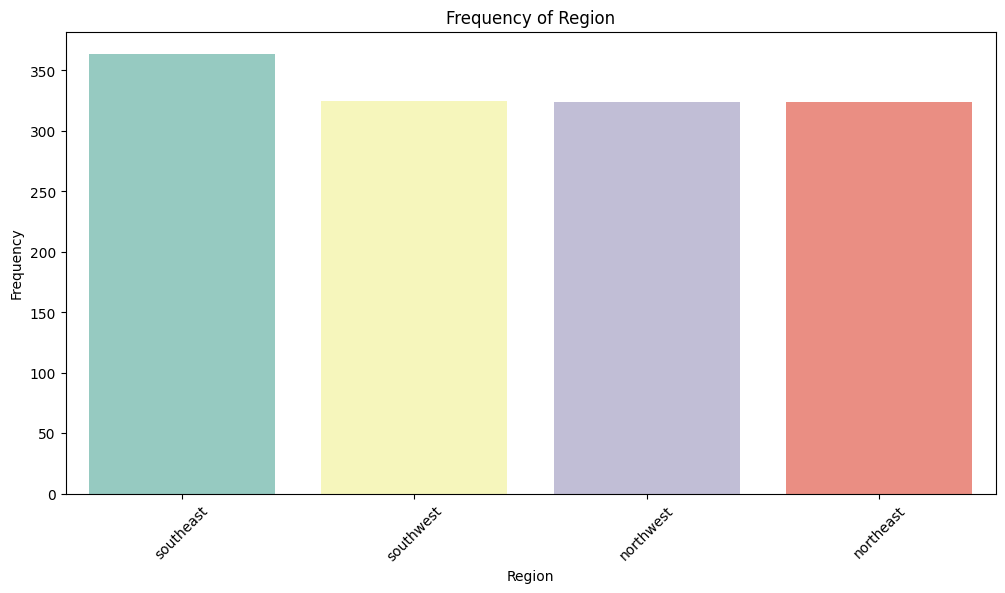

In [ ]:

region_frequency = df['region'].value_counts().reset_index()
region_frequency.columns = ['region', 'Frequency']
print('Frequency Table for Region:')
print(region_frequency)




plt.figure(figsize=(12, 6))
sns.barplot(data=region_frequency, x='region', y='Frequency', palette="Set3")
plt.title('Frequency of Region')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

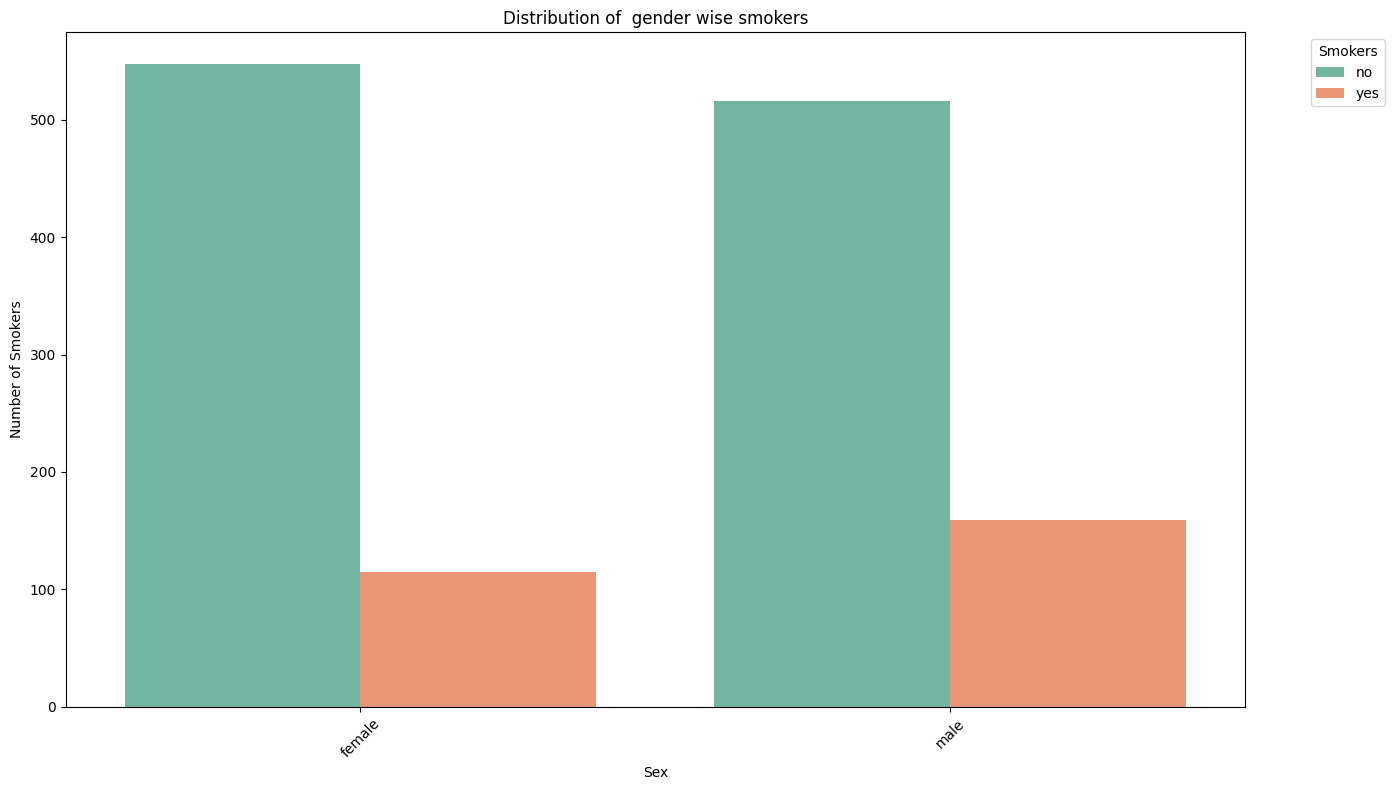

In [ ]:

sex_smokers = df.groupby(['sex', 'smoker']).size().reset_index(name='counts')


plt.figure(figsize=(14, 8))
sns.barplot(data=sex_smokers, x='sex', y='counts', hue='smoker', palette='Set2')
plt.title('Distribution of  gender wise smokers')
plt.xlabel('Sex')
plt.ylabel('Number of Smokers')
plt.legend(title='Smokers', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

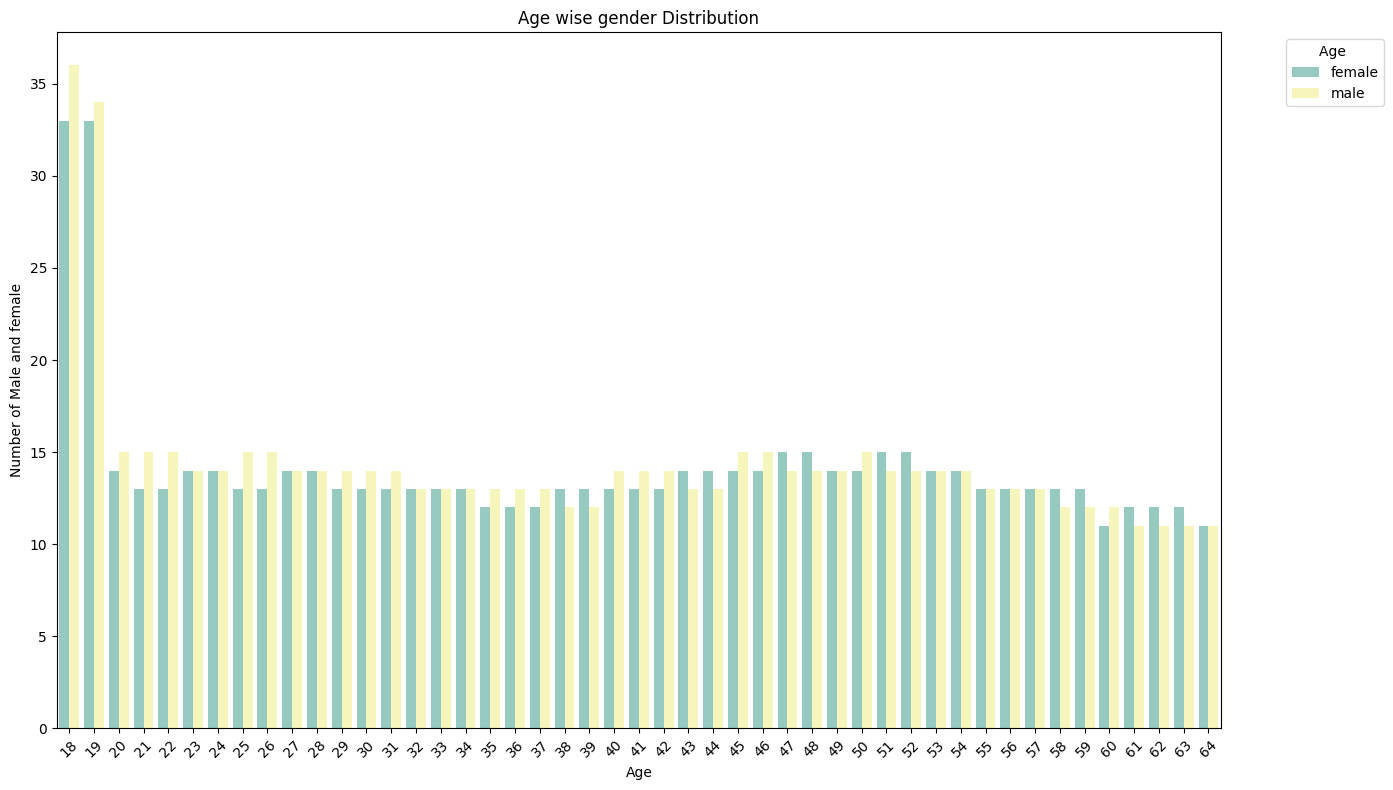

In [ ]:
sex_age = df.groupby(['sex', 'age']).size().reset_index(name='counts')


plt.figure(figsize=(14, 8))
sns.barplot(data=sex_age, x='age', y='counts', hue='sex', palette='Set3')
plt.title('Age wise gender Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Male and female')
plt.legend(title='Age ', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

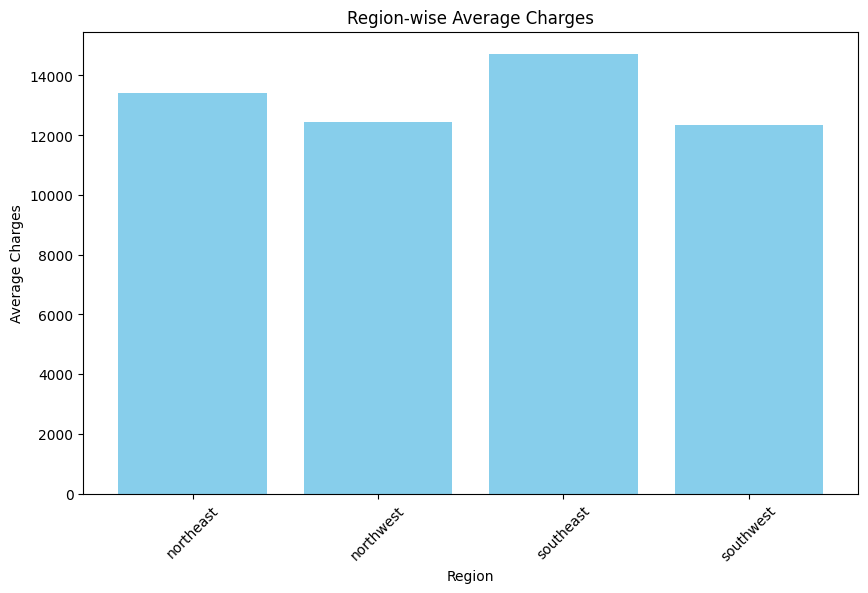

In [ ]:
# Group by region and calculate the mean charges
region_charges = df.groupby('region')['charges'].mean().reset_index()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(region_charges['region'], region_charges['charges'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.title('Region-wise Average Charges')
plt.xticks(rotation=45)
plt.show()

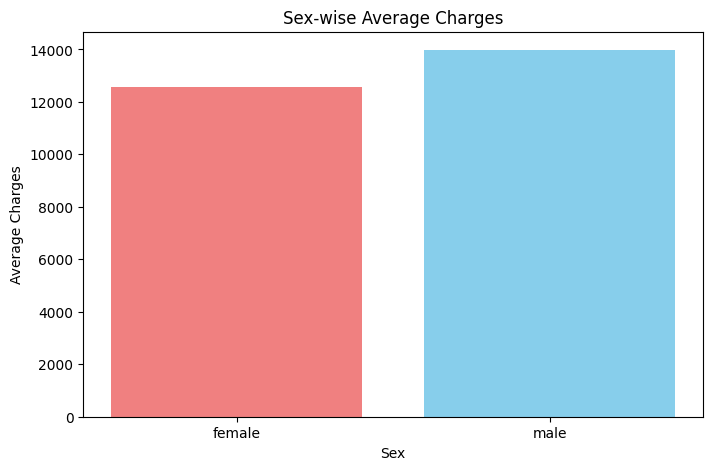

In [ ]:
sex_charges = df.groupby('sex')['charges'].mean().reset_index()

# Define colors for each bar
colors = ['lightcoral', 'skyblue']

# Plotting the results with different colors for each bar
plt.figure(figsize=(8, 5))
plt.bar(sex_charges['sex'], sex_charges['charges'], color=colors)
plt.xlabel('Sex')
plt.ylabel('Average Charges')
plt.title('Sex-wise Average Charges')
plt.xticks(rotation=0)
plt.show()

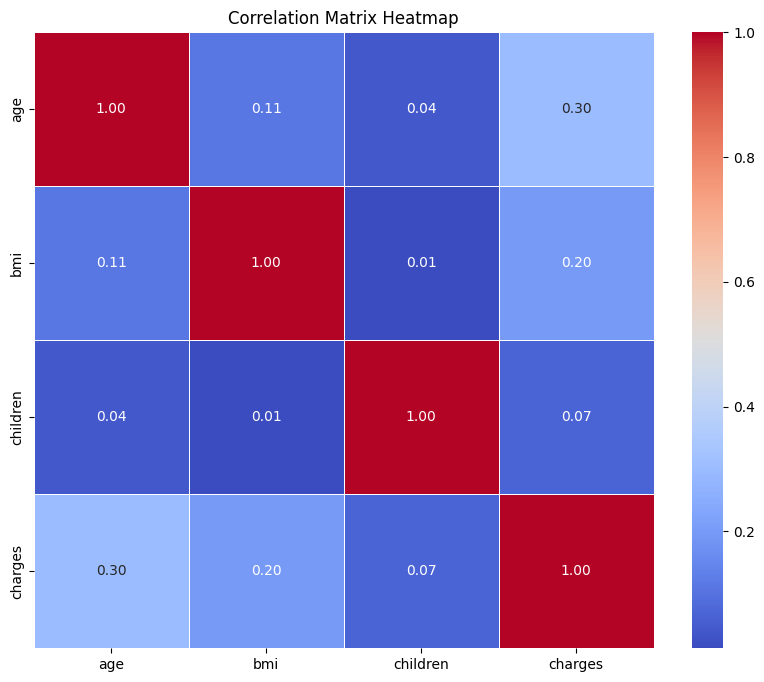

In [ ]:
# Select numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Model Evaluation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Define features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Preprocessing for numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

# Dictionary to store model evaluation results
results = {}

# Train, predict, and evaluate each model
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    mae, mse, r2 = evaluate_model(pipeline, X_train, X_test, y_train, y_test)
    results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)


                                     MAE           MSE        R2
Linear Regression            4177.045561  3.547802e+07  0.806929
Random Forest Regressor      2586.373908  2.189189e+07  0.880864
Gradient Boosting Regressor  2535.062045  1.824908e+07  0.900689


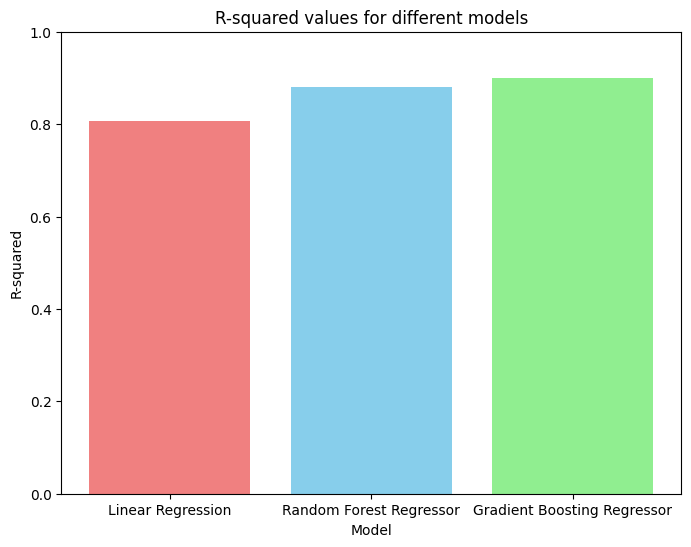

In [ ]:
# R-squared values
r2_values = {
    'Linear Regression': 0.806929,
    'Random Forest Regressor': 0.880864,
    'Gradient Boosting Regressor': 0.900689
}

# Define colors for each model
colors = ['lightcoral', 'skyblue', 'lightgreen']

# Plotting the R-squared values with different colors for each bar
plt.figure(figsize=(8, 6))
plt.bar(r2_values.keys(), r2_values.values(), color=colors)
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('R-squared values for different models')
plt.ylim(0, 1)  # Set y-axis limits to ensure proper visualization of R-squared values
plt.show()



1. **Linear Regression**:
   - **MAE (Mean Absolute Error)**: Linear regression assumes a linear relationship between the independent variables (features) and the target variable (medical costs). It tries to fit a straight line to the data that minimizes the absolute differences between the predicted and actual values. The MAE of 4177.045561 indicates that, on average, the model's predictions deviate by approximately $4177 from the actual medical costs.
   - **MSE (Mean Squared Error)**: Similarly, MSE measures the average squared differences between the predicted and actual values. It penalizes larger errors more severely than MAE. The MSE of 3.547802e+07 suggests that the errors, when squared, result in a large total error.
   - **R-squared (Coefficient of Determination)**: R-squared measures the proportion of the variance in the target variable that is explained by the independent variables. An R-squared of 0.806929 indicates that approximately 80.69% of the variance in medical costs is explained by the features included in the linear regression model. This suggests that the model captures a substantial portion of the variability in the target variable, but there is still room for improvement.

2. **Random Forest Regressor**:
   - **MAE**: Random Forest Regressor is an ensemble learning method that constructs multiple decision trees during training and outputs the average prediction of the individual trees. It is capable of capturing complex nonlinear relationships between the features and the target variable. The lower MAE of 2586.373908 compared to linear regression suggests that the Random Forest model is better at making predictions with smaller errors on this dataset.
   - **MSE**: Similarly, the lower MSE of 2.189189e+07 compared to linear regression indicates that the Random Forest model's predictions have smaller squared errors, resulting in a lower total error.
   - **R-squared**: The higher R-squared of 0.880864 suggests that Random Forest captures more variance in the target variable compared to linear regression, approximately 88.08%.

3. **Gradient Boosting Regressor**:
   - **MAE**: Gradient Boosting Regressor is another ensemble learning technique that combines weak learners (decision trees) sequentially to improve prediction accuracy. It focuses on reducing the errors of the previous models in the ensemble. The lower MAE of 2535.062045 compared to both linear regression and Random Forest indicates that Gradient Boosting performs better in terms of average absolute error on this dataset.
   - **MSE**: The lower MSE of 1.824908e+07 compared to both linear regression and Random Forest suggests that Gradient Boosting's predictions have smaller squared errors, resulting in a lower total error.
   - **R-squared**: The highest R-squared of 0.900689 among the three models indicates that Gradient Boosting captures the most variance in the target variable, approximately 90.07%, suggesting that it explains the variability in medical costs more effectively than the other models.

In summary, each model's performance is influenced by its underlying assumptions, complexity, and ability to capture the relationships present in the dataset. Linear regression assumes a linear relationship, while Random Forest and Gradient Boosting can capture more complex nonlinear relationships. The differences in performance metrics highlight the strengths and weaknesses of each model on this particular dataset.